In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing dataset
dataset = pd.read_csv('Data.csv')
print(len(dataset))
dataset.head()

6335


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

corpus = []

for i in range(0,6335): 
  # Replace non-letters and punctuation with letters
  content = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
  # To make all letters lowercase
  content = content.lower()
  # Split each review into its word
  content = content.split()
  # Classic way of applying stemming
  ps = PorterStemmer()
  # Removing stopwords
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  content = [ps.stem(word) for word in content if not word in set(all_stopwords)]
  content = ' '.join(content)
  corpus.append(content)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rodinsh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # the parameter sets the limit of words to only most frequent words
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,-1].values

In [5]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 1 ... 0 1 1]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# First Model: Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [8]:
y_pred_nb = model_nb.predict(X_test)

[[1 1]
 [0 0]
 [1 0]
 ...
 [1 1]
 [1 1]
 [1 1]]
A fake news detection algorithm with 78.93% accuracy


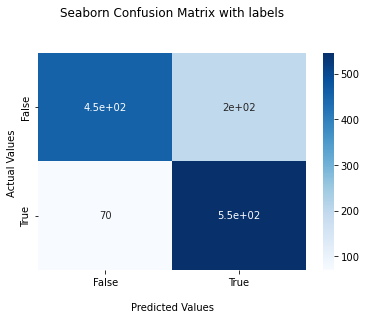

In [20]:
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

print(np.concatenate((y_pred_nb.reshape(len(y_pred_nb), 1), y_test.reshape(len(y_test), 1)),1))
acc = accuracy_score(y_test, y_pred_nb)
acc = round(acc, 4)
print("A fake news detection algorithm with "+str(100 * acc)+"% accuracy")

cf_matrix = confusion_matrix(y_test, y_pred_nb)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Second Model: Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

/Users/rodinsh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred_lr = model_lr.predict(X_test)

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 1]
 [1 1]
 [1 1]]
A fake news detection algorithm with 92.74% accuracy


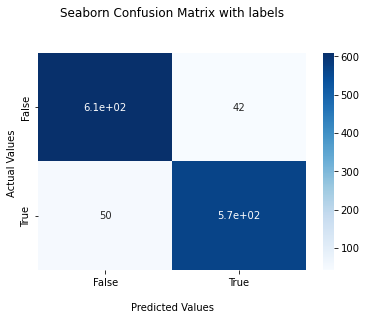

In [42]:
print(np.concatenate((y_pred_lr.reshape(len(y_pred_lr), 1), y_test.reshape(len(y_test), 1)),1))
acc = accuracy_score(y_test, y_pred_lr)
acc = round(acc, 4)
print("A fake news detection algorithm with "+str(100 * acc)+"% accuracy")

cf_matrix = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Third Model: Support Vector Machines

In [24]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf')
model_svc.fit(X_train, y_train)

SVC()

In [25]:
y_pred_svc = model_svc.predict(X_test)

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 1]
 [1 1]
 [1 1]]
A fake news detection algorithm with 88.48% accuracy


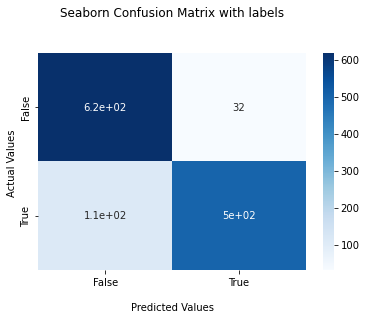

In [43]:
print(np.concatenate((y_pred_svc.reshape(len(y_pred_svc), 1), y_test.reshape(len(y_test), 1)),1))
acc = accuracy_score(y_test, y_pred_svc)
acc = round(acc, 4)
print("A fake news detection algorithm with "+str(100 * acc)+"% accuracy")

cf_matrix = confusion_matrix(y_test, y_pred_svc)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Fourth Model: Stochastic Gradient Descent Classifier

In [27]:
from sklearn.linear_model import SGDClassifier
model_sgdc = SGDClassifier()
model_sgdc.fit(X_train, y_train)

SGDClassifier()

In [28]:
y_pred_sgdc = model_sgdc.predict(X_test)

[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]
A fake news detection algorithm with 91.63% accuracy


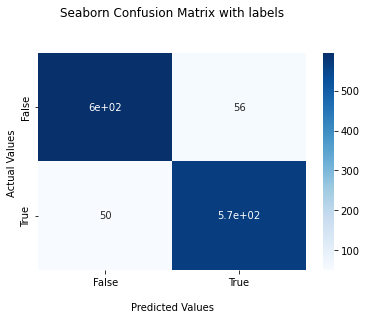

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(np.concatenate((y_pred_sgdc.reshape(len(y_pred_sgdc), 1), y_test.reshape(len(y_test), 1)),1))
acc = accuracy_score(y_test, y_pred_sgdc)
acc = round(acc, 4)
print("A fake news detection algorithm with "+str(100 * acc)+"% accuracy")

cf_matrix = confusion_matrix(y_test, y_pred_sgdc)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Fifth Model: K-Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred_knn = model_knn.predict(X_test)

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 1]
 [1 1]
 [1 1]]
A fake news detection algorithm with 78.77% accuracy


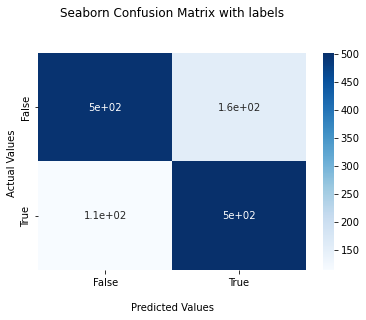

In [45]:
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn), 1), y_test.reshape(len(y_test), 1)),1))
acc = accuracy_score(y_test, y_pred_knn)
acc = round(acc, 4)
print("A fake news detection algorithm with "+str(100 * acc)+"% accuracy")

cf_matrix = confusion_matrix(y_test, y_pred_knn)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Sixth Model: Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred_dt = model_dt.predict(X_test)

[[0 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]
A fake news detection algorithm with 81.37% accuracy


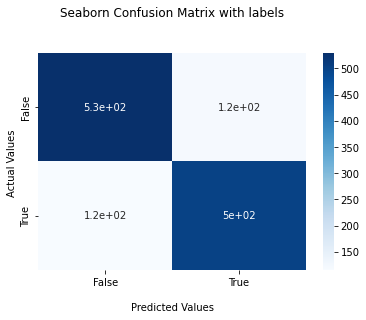

In [46]:
print(np.concatenate((y_pred_dt.reshape(len(y_pred_dt), 1), y_test.reshape(len(y_test), 1)),1))
acc = accuracy_score(y_test, y_pred_dt)
acc = round(acc, 4)
print("A fake news detection algorithm with "+str(100 * acc)+"% accuracy")

cf_matrix = confusion_matrix(y_test, y_pred_dt)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Seventh Model: Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_pred_rf = model_rf.predict(X_test)

[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]
A fake news detection algorithm with 89.66% accuracy


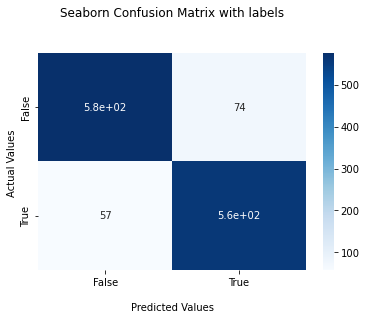

In [47]:
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf), 1), y_test.reshape(len(y_test), 1)),1))
acc = accuracy_score(y_test, y_pred_rf)
acc = round(acc, 4)
print("A fake news detection algorithm with "+str(100 * acc)+"% accuracy")

cf_matrix = confusion_matrix(y_test, y_pred_rf)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Eighth Model: Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier()
model_gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [40]:
y_pred_gbc = model_gbc.predict(X_test)

[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]
A fake news detection algorithm with 89.74% accuracy


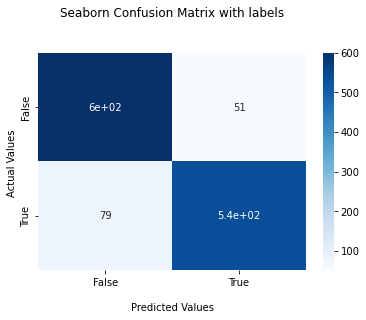

In [49]:
print(np.concatenate((y_pred_gbc.reshape(len(y_pred_gbc), 1), y_test.reshape(len(y_test), 1)),1))
acc = accuracy_score(y_test, y_pred_gbc)
acc = round(acc, 4)
print("A fake news detection algorithm with "+str(100 * acc)+"% accuracy")

cf_matrix = confusion_matrix(y_test, y_pred_gbc)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Testing Custom Examples

In [31]:
# Perform same preprocessing operations on the test input
def text_input_clean(example):
    example = re.sub('[^a-zA-Z]', ' ', example)
    example = example.lower()
    example = example.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    example = [ps.stem(word) for word in example if not word in set(all_stopwords)]
    example = ' '.join(example)
    new_corpus = [example]
    new_X_test = cv.transform(new_corpus).toarray()

In [ ]:
# Predicting one example
# Taking a text as input
text_input = ''
text_input = input('Enter a piece of text: ')
new_X_test = text_input_formatting(text_input)
print(test_y_pred)